In [1]:
'''Data Set Information:

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it,
and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, 
which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location
(hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing),
and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).'''

'Data Set Information:\n\nPredicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it,\nand counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, \nwhich are easier to obtain, are used to predict the age. Further information, such as weather patterns and location\n(hence food availability) may be required to solve the problem.\n\nFrom the original data examples with missing values were removed (the majority having the predicted value missing),\nand the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).'

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #to plot in 3D
from pandas_profiling import ProfileReport

#from lazypredict.supervised import lazyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline

In [14]:
#importing data
data=pd.read_csv('abalone.data',header=None,index_col=False)
data.columns=['sex','length','diameter','height','whole_weight','shucked_weight',
             'viscera_weight','shell_weight','rings']
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


EXPLORATORY DATA ANALYSIS

In [16]:
#For this we used the pandas_profiling library
profile=ProfileReport(data)
profile

C:\Users\User\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,9
Number of observations,4177
Total Missing (%),0.0%
Total size in memory,293.8 KiB
Average record size in memory,72.0 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,5


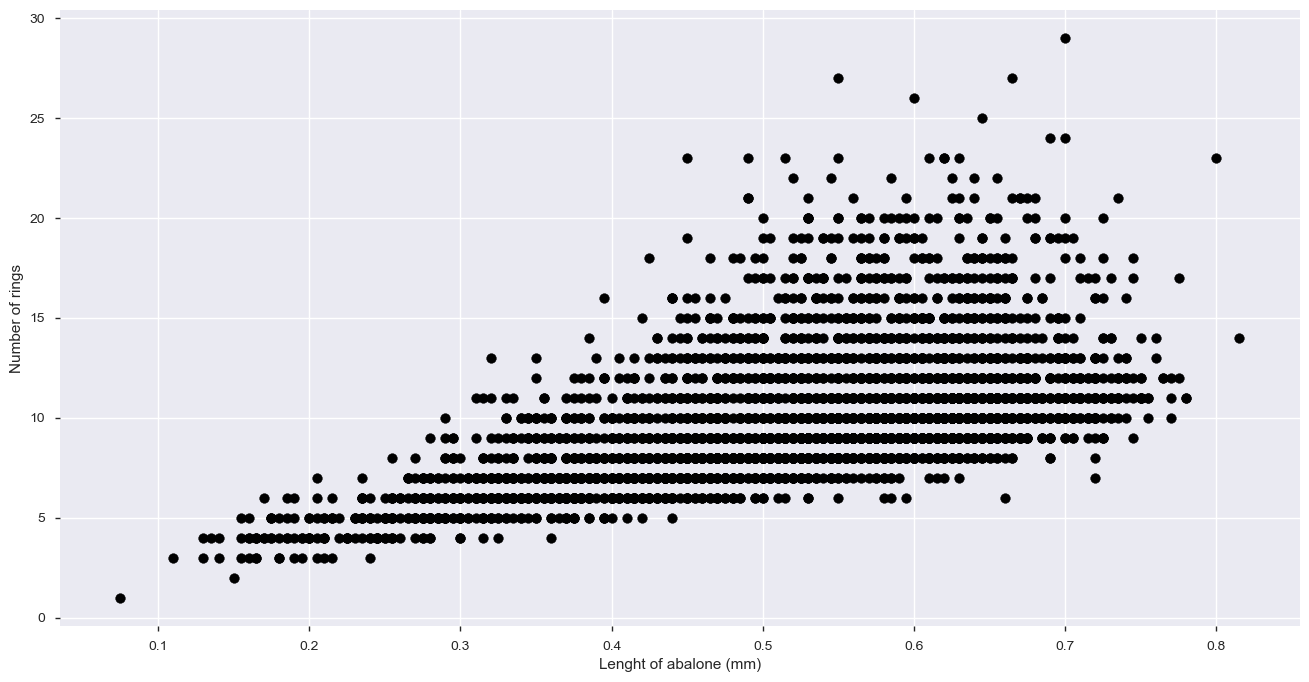

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(data['length'],data['rings'],c='black')
plt.xlabel('Lenght of abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

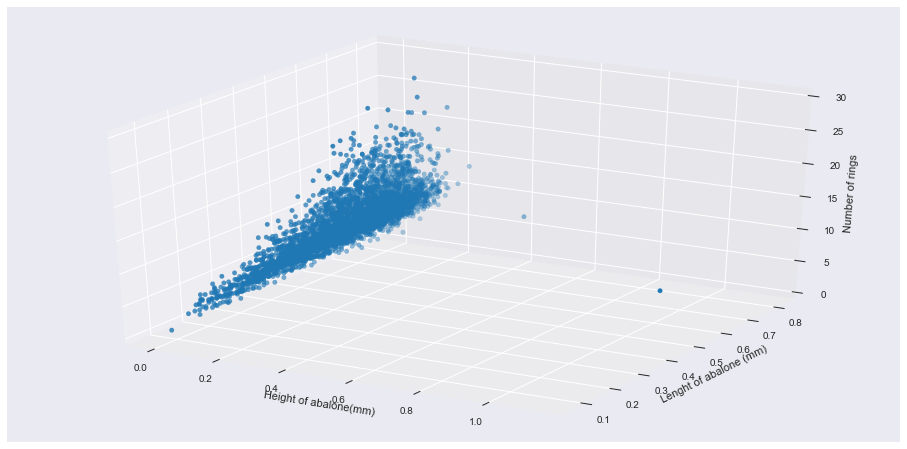

In [20]:
#making a 3D plot of length and height against rings
fig=plt.figure(figsize=(16,8))
ax=plt.axes(projection='3d')
ax.set_xlabel('Height of abalone(mm)')
ax.set_ylabel('Lenght of abalone (mm)')
ax.set_zlabel('Number of rings')
ax.scatter3D(data['height'],data['length'],data['rings'])
plt.show()

Feature Enginneering(One-hot encoding)

In [21]:
encoded_data=pd.get_dummies(data)
encoded_data.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


Modelling a baselline model

In [23]:
training_set=encoded_data.iloc[:4099,:]
validation_set=encoded_data.iloc[4099:,:]

print(training_set.shape)
print(validation_set.shape)

(4099, 11)
(78, 11)


In [35]:
#Baseline model:multiple linear Regression
x=training_set[['length','height']]
y=training_set[['rings']].values.reshape(-1,1)

#The validation set is to see how the model will perform against unseen data
x_val=validation_set[['length','height']]
y_val=validation_set[['rings']].values.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [42]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

#Test RMSE
lin_reg_pred=lin_reg.predict(x_test)
test_rmse=mean_squared_error(y_test,lin_reg_pred)
print(f'Test RMSE: {np.sqrt(test_rmse)}')


#Validation RMSE
lin_reg_pred_val=lin_reg.predict(x_val)
val_rmse=mean_squared_error(y_val,lin_reg_pred_val)
print(f'validation RMSE: {np.sqrt(val_rmse)}')


Test RMSE: 2.5679099174951547
validation RMSE: 1.5661783782311625


USING LINEAR REGRESSION REGULARIZATION

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters={'alpha':[1e-15,1e-14,1e-10,1e-9,1e-5,1e-2,1e-1,1,1.5,2,3,4,5,6]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

print(ridge_regressor.best_params_)
print(np.sqrt(-ridge_regressor.best_score_))

{'alpha': 1.5}
2.659386679839669


In [53]:
#Using the best params to carry out prediction
ridge_reg=Ridge(alpha=1.5)
ridge_reg.fit(x_train,y_train)

#Test RMSE
ridge_reg_pred=ridge_reg.predict(x_test)
test_rmse=mean_squared_error(y_test,ridge_reg_pred)
print(f'Ridge test RMSE : {np.sqrt(test_rmse)}')

#Validation RMSE
ridge_reg_pred_val=ridge_reg.predict(x_val)
val_rmse=mean_squared_error(y_val,ridge_reg_pred_val)
print(f'Validation test RMSE : {np.sqrt(val_rmse)}')


Ridge test RMSE : 2.5934441387424956
Validation test RMSE : 1.5625890677307226


LASSO REGRESSION

In [54]:
#Lasso(L1)
from sklearn.linear_model import Lasso
lasso=Lasso(tol=0.05)
parameters={'alpha':[1e-15,1e-14,1e-10,1e-9,1e-5,1e-2,1e-1,1,1.5,2,3,4,5,6]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)

print(lasso_regressor.best_params_)
print(np.sqrt(-lasso_regressor.best_score_))

{'alpha': 0.01}
2.670425185758418


In [55]:
#Using the best params to carry out prediction
lasso_reg=Lasso(alpha=0.01)
lasso_reg.fit(x_train,y_train)

#Test RMSE
lasso_reg_pred=lasso_reg.predict(x_test)
test_rmse=mean_squared_error(y_test,lasso_reg_pred)
print(f'lasso test RMSE : {np.sqrt(test_rmse)}')

#Validation RMSE
lasso_reg_pred_val=lasso_reg.predict(x_val)
val_rmse=mean_squared_error(y_val,lasso_reg_pred_val)
print(f'lasso validation RMSE : {np.sqrt(val_rmse)}')

lasso test RMSE : 2.610473125813745
lasso validation RMSE : 1.5563831232308813


USING TREE BASED MODELS

In [58]:
x=training_set.drop(['diameter','whole_weight','shucked_weight',
             'viscera_weight','shell_weight','rings'],axis=1)
y=training_set['rings'].values.reshape(-1,1)

x_val=validation_set.drop(['diameter','whole_weight','shucked_weight',
             'viscera_weight','shell_weight','rings'],axis=1)
y_val=validation_set['rings'].values.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [61]:
#importing the models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

rf=RandomForestRegressor()
parameters={'n_estimators' : [int(x)for x in np.linspace(100,1000,5)]}
rf_regressor=GridSearchCV(rf,parameters,scoring='neg_mean_squared_error',cv=5)

rf_regressor.fit(x_train,y_train.ravel())
print(rf_regressor.best_params_)
print(np.sqrt(-rf_regressor.best_score_))

{'n_estimators': 1000}
2.8960465612169934


In [64]:
#Using the rf params on test
rf_reg=RandomForestRegressor(n_estimators=1000)
rf_reg.fit(x_train,y_train.ravel())

#Test RMSE
rf_reg_pred=rf_reg.predict(x_test)
test_rmse=mean_squared_error(y_test,rf_reg_pred)
print(f'Random Forest test RMSE : {np.sqrt(test_rmse)}')

#Validation RMSE
rf_reg_pred_val=rf_reg.predict(x_val)
val_rmse=mean_squared_error(y_val,rf_reg_pred_val)
print(f'Random forest validation RMSE : {np.sqrt(val_rmse)}')

Random Forest test RMSE : 2.6445871929115063
Random forest validation RMSE : 2.233218938132645


BAGGING

In [68]:
bg=BaggingRegressor()
parameters={'n_estimators' : [int(x)for x in np.linspace(100,1000,5)],
             'max_samples':[float(x)for x in np.arange(0.1,1.1,0.1)]}
bg_regressor=GridSearchCV(bg,parameters,scoring='neg_mean_squared_error',cv=5)
bg_regressor.fit(x_train,y_train.ravel())
print(bg_regressor.best_params_)
print(np.sqrt(-bg_regressor.best_score_))


{'max_samples': 0.1, 'n_estimators': 1000}
2.5636265439463237


In [72]:
bg_reg=BaggingRegressor(n_estimators=1000,max_samples=0.1)
bg_reg.fit(x_train,y_train.ravel())


#Test RMSE
bg_reg_pred=bg_reg.predict(x_test)
test_rmse=mean_squared_error(y_test,bg_reg_pred)
print(f'Bagging test RMSE : {np.sqrt(test_rmse)}')

#Validation RMSE
bg_reg_pred_val=bg_reg.predict(x_val)
val_rmse=mean_squared_error(y_val,bg_reg_pred_val)
print(f'Bagging validation RMSE : {np.sqrt(val_rmse)}')


Bagging test RMSE : 2.424249514920332
Bagging validation RMSE : 1.7556138569561555


USING BOOSTING MODELS


In [79]:
import lightgbm as lgb
params={'learning_rate':'0.01'}
train_data=lgb.Dataset(x_train.values,label=y_train.ravel())

lgb_reg=lgb.train(params,train_data,100)

#Test RMSE
lgb_reg_pred=lgb_reg.predict(x_test)
test_rmse=mean_squared_error(y_test,lgb_reg_pred)
print(f'LGBM RMSE : {np.sqrt(test_rmse)}')

#validation RMSE
lgb_reg_pred_val=lgb_reg.predict(x_val)
val_rmse=mean_squared_error(y_val,lgb_reg_pred_val)
print(f'Validation of LGBM validation : {np.sqrt(val_rmse)}')

LGBM RMSE : 2.5516374432050553
Validation of LGBM validation : 1.5097310114966809


In [80]:
#Next i will try using the lazy predict library